In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
plt.rcParams["figure.figsize"] = (10,5)

In [3]:
mf = pd.read_csv('Machine Failure.csv')

In [4]:
mf.shape

(8784, 28)

In [5]:
mf.head()

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,...,1842,90,No,2016,1,1,5,0,0,0
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,...,748,91,No,2016,1,1,5,1,0,0
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,...,1689,92,No,2016,1,1,5,2,0,0
3,2016-01-01 03:00:00,63,80,Operator1,550,1,1,1754,1834,1413,...,711,93,No,2016,1,1,5,3,0,0
4,2016-01-01 04:00:00,65,81,Operator1,1928,1,2,1326,1082,233,...,507,94,No,2016,1,1,5,4,0,0


In [6]:
mf.tail()

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
8779,2016-12-31 19:00:00,66,79,Operator8,937,0,2,1875,1719,219,...,410,7,No,2016,12,31,6,19,0,0
8780,2016-12-31 20:00:00,60,77,Operator8,379,3,0,814,1990,1606,...,943,8,No,2016,12,31,6,20,0,0
8781,2016-12-31 21:00:00,61,77,Operator8,595,3,1,1659,1134,1314,...,200,9,No,2016,12,31,6,21,0,0
8782,2016-12-31 22:00:00,72,81,Operator8,1038,3,2,254,1400,564,...,1192,10,No,2016,12,31,6,22,0,0
8783,2016-12-31 23:00:00,60,82,Operator8,399,0,1,324,1424,809,...,1548,11,No,2016,12,31,6,23,0,0


In [7]:
mf.Temperature.unique()

array([67, 68, 64, 63, 65, 61, 62, 60, 66, 69, 71, 72, 70, 12, 73, 28, 75,
       74, 19, 77, 76,  5, 78], dtype=int64)

In [8]:
mf.Humidity.unique()

array([ 82,  77,  76,  80,  81,  84,  83,  79,  85,  75,  78, 110,  65,
        67,  68,  70,  86,  71,  72,  69,  88,  87,  73, 109,  93,  92,
        90,  91,  89, 122,  74,  94,  95,  66, 120], dtype=int64)

In [9]:
mf.Operator.unique()

array(['Operator1', 'Operator3', 'Operator5', 'Operator2', 'Operator4',
       'Operator6', 'Operator7', 'Operator8'], dtype=object)

In [10]:
mf.Measure1.describe()

count    8784.000000
mean     1090.900387
std       537.097769
min       155.000000
25%       629.000000
50%      1096.000000
75%      1555.000000
max      2011.000000
Name: Measure1, dtype: float64

In [11]:
mf.Measure2.describe()

count    8784.000000
mean        1.489868
std         1.115605
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Measure2, dtype: float64

In [12]:
mf.Measure3.describe()

count    8784.000000
mean        0.999203
std         0.816473
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Measure3, dtype: float64

In [13]:
mf.Measure4.describe()

count    8784.000000
mean     1071.629895
std       536.518466
min       155.000000
25%       608.750000
50%      1058.000000
75%      1533.000000
max      2011.000000
Name: Measure4, dtype: float64

In [14]:
mf.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,...,Measure14,Measure15,Hours Since Previous Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,...,8784.000000,8784.000000,8784.000000,8784.0,8784.000000,8784.000000,8784.000000,8784.000000,8784.0,8784.0
mean,64.026412,83.337090,1090.900387,1.489868,0.999203,1071.629895,1075.822860,1076.023793,1086.897086,1077.277209,...,1088.307377,1082.392304,217.341872,2016.0,6.513661,15.756831,4.008197,11.500000,0.0,0.0
std,2.868833,4.836256,537.097769,1.115605,0.816473,536.518466,533.158826,534.004966,538.195156,537.187671,...,537.264847,537.527604,151.751750,0.0,3.451430,8.812031,1.998047,6.922581,0.0,0.0
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,1.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,62.000000,80.000000,629.000000,0.000000,0.000000,608.750000,606.000000,623.000000,621.000000,612.000000,...,617.000000,614.000000,90.000000,2016.0,4.000000,8.000000,2.000000,5.750000,0.0,0.0
50%,64.000000,83.000000,1096.000000,1.000000,1.000000,1058.000000,1077.000000,1072.000000,1089.000000,1074.000000,...,1088.500000,1076.000000,195.000000,2016.0,7.000000,16.000000,4.000000,11.500000,0.0,0.0
75%,66.000000,87.000000,1555.000000,2.000000,2.000000,1533.000000,1541.000000,1537.000000,1558.000000,1541.000000,...,1560.000000,1550.000000,324.000000,2016.0,10.000000,23.000000,6.000000,17.250000,0.0,0.0
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,...,2011.000000,2011.000000,666.000000,2016.0,12.000000,31.000000,7.000000,23.000000,0.0,0.0


In [15]:
mf.Measure9.describe()

count    8784.000000
mean     1082.014572
std       532.983115
min       155.000000
25%       631.000000
50%      1078.000000
75%      1532.000000
max      2011.000000
Name: Measure9, dtype: float64

In [16]:
mf.Measure10.describe()

count    8784.000000
mean     1082.403005
std       537.582829
min       155.000000
25%       619.000000
50%      1080.000000
75%      1547.000000
max      2011.000000
Name: Measure10, dtype: float64

In [17]:
mf.Measure11.describe()

count    8784.000000
mean     1088.719148
std       534.995992
min       155.000000
25%       627.000000
50%      1093.000000
75%      1550.000000
max      2011.000000
Name: Measure11, dtype: float64

In [18]:
mf.Measure12.describe()

count    8784.000000
mean     1088.329349
std       533.299486
min       155.000000
25%       627.000000
50%      1082.000000
75%      1552.000000
max      2011.000000
Name: Measure12, dtype: float64

In [19]:
mf.Measure12.describe()

count    8784.000000
mean     1088.329349
std       533.299486
min       155.000000
25%       627.000000
50%      1082.000000
75%      1552.000000
max      2011.000000
Name: Measure12, dtype: float64

In [20]:
mf.Measure13.describe()

count    8784.000000
mean     1076.755806
std       535.111353
min       155.000000
25%       609.000000
50%      1067.000000
75%      1539.000000
max      2011.000000
Name: Measure13, dtype: float64

In [21]:
mf.columns[mf.isnull().any()]

Index([], dtype='object')

In [22]:
mf.dtypes

Date                            object
Temperature                      int64
Humidity                         int64
Operator                        object
Measure1                         int64
Measure2                         int64
Measure3                         int64
Measure4                         int64
Measure5                         int64
Measure6                         int64
Measure7                         int64
Measure8                         int64
Measure9                         int64
Measure10                        int64
Measure11                        int64
Measure12                        int64
Measure13                        int64
Measure14                        int64
Measure15                        int64
Hours Since Previous Failure     int64
Failure                         object
﻿Date.year                       int64
﻿Date.month                      int64
﻿Date.day-of-month               int64
﻿Date.day-of-week                int64
﻿Date.hour               

In [23]:
mf.drop(mf.columns[len(mf.columns)-1], axis=1, inplace=True)
mf.drop(mf.columns[len(mf.columns)-1], axis=1, inplace=True)
mf.drop(mf.columns[len(mf.columns)-1], axis=1, inplace=True)
mf.drop(mf.columns[len(mf.columns)-1], axis=1, inplace=True)
mf.drop(mf.columns[len(mf.columns)-1], axis=1, inplace=True)
mf.drop(mf.columns[len(mf.columns)-1], axis=1, inplace=True)

In [24]:
mf.head()

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,﻿Date.year
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,...,256,1295,766,968,1185,1355,1842,90,No,2016
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,...,919,245,403,723,1446,719,748,91,No,2016
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,...,1301,273,1927,1123,717,1518,1689,92,No,2016
3,2016-01-01 03:00:00,63,80,Operator1,550,1,1,1754,1834,1413,...,1312,1494,1755,1434,502,1336,711,93,No,2016
4,2016-01-01 04:00:00,65,81,Operator1,1928,1,2,1326,1082,233,...,1033,1549,802,1819,1616,1507,507,94,No,2016


In [25]:
mf.drop(mf.columns[len(mf.columns)-1], axis=1, inplace=True)

In [26]:
mf.head()

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,...,1086,256,1295,766,968,1185,1355,1842,90,No
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,...,524,919,245,403,723,1446,719,748,91,No
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,...,1882,1301,273,1927,1123,717,1518,1689,92,No
3,2016-01-01 03:00:00,63,80,Operator1,550,1,1,1754,1834,1413,...,945,1312,1494,1755,1434,502,1336,711,93,No
4,2016-01-01 04:00:00,65,81,Operator1,1928,1,2,1326,1082,233,...,1736,1033,1549,802,1819,1616,1507,507,94,No


In [27]:
mf['Date'] = pd.to_datetime(mf['Date'])

In [28]:
mf['month'] = mf['Date'].dt.month
mf['date'] = mf['Date'].dt.day
mf['hour'] = mf['Date'].dt.hour
mf['dayOfWeek'] = mf['Date'].dt.day_name()

In [29]:
mf.head()

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,month,date,hour,dayOfWeek
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,...,968,1185,1355,1842,90,No,1,1,0,Friday
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,...,723,1446,719,748,91,No,1,1,1,Friday
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,...,1123,717,1518,1689,92,No,1,1,2,Friday
3,2016-01-01 03:00:00,63,80,Operator1,550,1,1,1754,1834,1413,...,1434,502,1336,711,93,No,1,1,3,Friday
4,2016-01-01 04:00:00,65,81,Operator1,1928,1,2,1326,1082,233,...,1819,1616,1507,507,94,No,1,1,4,Friday


In [30]:
dayOfWeekDict = {
    'Sunday' : 0,
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6    
}
mf['dayOfWeek'] = mf['dayOfWeek'].map(dayOfWeekDict)
mf.head()

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,...,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,month,date,hour,dayOfWeek
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,...,968,1185,1355,1842,90,No,1,1,0,5
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,...,723,1446,719,748,91,No,1,1,1,5
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,...,1123,717,1518,1689,92,No,1,1,2,5
3,2016-01-01 03:00:00,63,80,Operator1,550,1,1,1754,1834,1413,...,1434,502,1336,711,93,No,1,1,3,5
4,2016-01-01 04:00:00,65,81,Operator1,1928,1,2,1326,1082,233,...,1819,1616,1507,507,94,No,1,1,4,5


In [31]:
mf.drop(columns=['Date'], inplace=True)

In [32]:
mf.head()

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,...,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,month,date,hour,dayOfWeek
0,67,82,Operator1,291,1,1,1041,846,334,706,...,968,1185,1355,1842,90,No,1,1,0,5
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,...,723,1446,719,748,91,No,1,1,1,5
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,...,1123,717,1518,1689,92,No,1,1,2,5
3,63,80,Operator1,550,1,1,1754,1834,1413,1151,...,1434,502,1336,711,93,No,1,1,3,5
4,65,81,Operator1,1928,1,2,1326,1082,233,1441,...,1819,1616,1507,507,94,No,1,1,4,5


In [33]:
numeric_columns = ['Temperature', 'Humidity', 'Measure1', 'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14', 'Measure15', 'Hours Since Previous Failure']
categorical_columns = ['Operator', 'Failure', 'month', 'date', 'hour', 'dayOfWeek']

In [34]:
failureDict = {
    'No' : 0,
    'Yes' : 1,
    }
mf['Failure'] = mf['Failure'].map(failureDict)
mf.head()

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,...,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,month,date,hour,dayOfWeek
0,67,82,Operator1,291,1,1,1041,846,334,706,...,968,1185,1355,1842,90,0,1,1,0,5
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,...,723,1446,719,748,91,0,1,1,1,5
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,...,1123,717,1518,1689,92,0,1,1,2,5
3,63,80,Operator1,550,1,1,1754,1834,1413,1151,...,1434,502,1336,711,93,0,1,1,3,5
4,65,81,Operator1,1928,1,2,1326,1082,233,1441,...,1819,1616,1507,507,94,0,1,1,4,5


In [35]:
opDict = {
    'Operator1' : 1,
    'Operator2' : 2,
    'Operator3' : 3,
    'Operator4' : 4,
    'Operator5' : 5,
    'Operator6' : 6,
    'Operator7' : 7,
    'Operator8' : 8,
    }
mf['Operator'] = mf['Operator'].map(opDict)
mf.head()

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,...,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,month,date,hour,dayOfWeek
0,67,82,1,291,1,1,1041,846,334,706,...,968,1185,1355,1842,90,0,1,1,0,5
1,68,77,1,1180,1,1,1915,1194,637,1093,...,723,1446,719,748,91,0,1,1,1,5
2,64,76,1,1406,1,1,511,1577,1121,1948,...,1123,717,1518,1689,92,0,1,1,2,5
3,63,80,1,550,1,1,1754,1834,1413,1151,...,1434,502,1336,711,93,0,1,1,3,5
4,65,81,1,1928,1,2,1326,1082,233,1441,...,1819,1616,1507,507,94,0,1,1,4,5


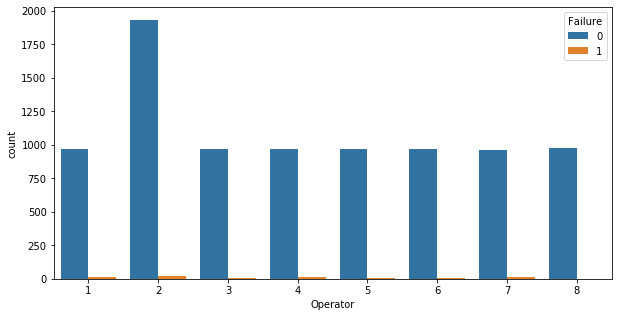

In [36]:
sns.countplot(x='Operator', hue='Failure', data=mf)

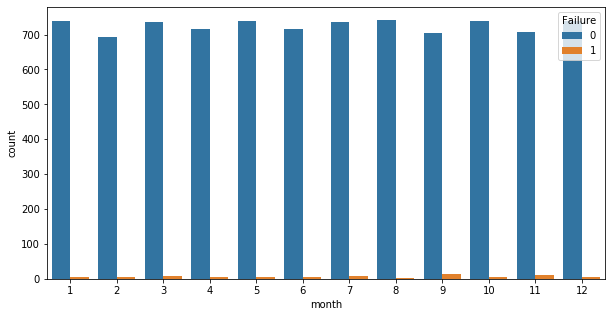

In [37]:
sns.countplot(x='month', hue='Failure', data=mf)

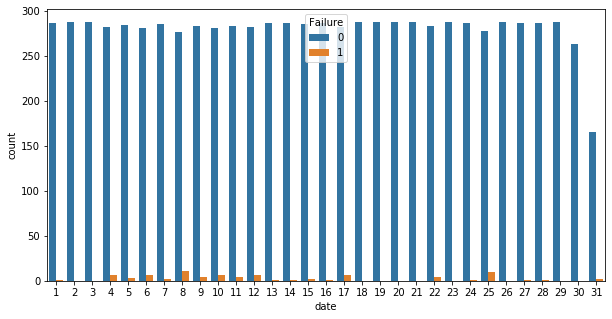

In [38]:
sns.countplot(x='date', hue='Failure', data=mf)

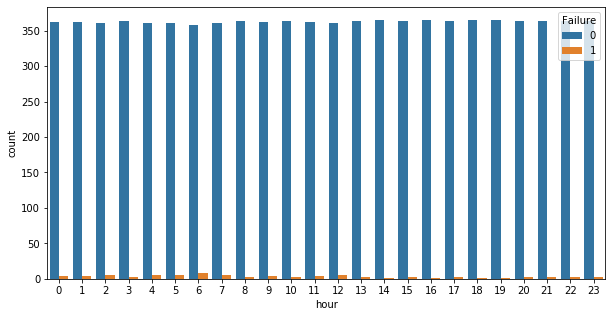

In [39]:
sns.countplot(x='hour', hue='Failure', data=mf)

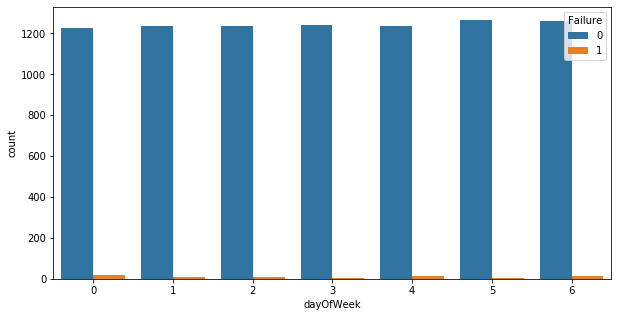

In [40]:
sns.countplot(x='dayOfWeek', hue='Failure', data=mf)

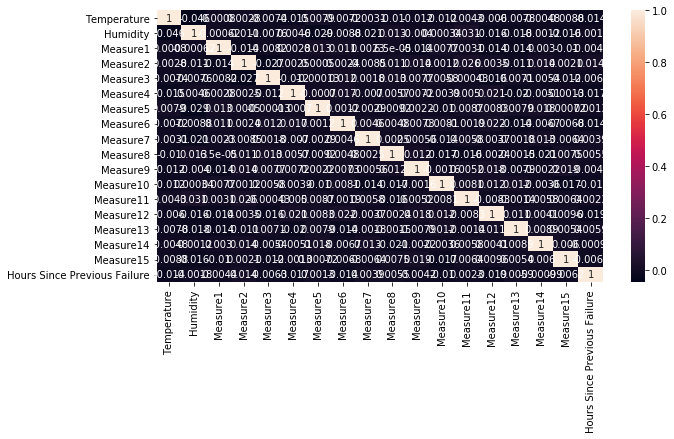

In [41]:
corr = mf[numeric_columns].corr()
#fig, ax = plt.subplots(figsize=(15,15))
#sns.heatmap(corr, annot=True, ax = ax)
sns.heatmap(corr, annot=True)

In [42]:
mf.head()

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,...,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,month,date,hour,dayOfWeek
0,67,82,1,291,1,1,1041,846,334,706,...,968,1185,1355,1842,90,0,1,1,0,5
1,68,77,1,1180,1,1,1915,1194,637,1093,...,723,1446,719,748,91,0,1,1,1,5
2,64,76,1,1406,1,1,511,1577,1121,1948,...,1123,717,1518,1689,92,0,1,1,2,5
3,63,80,1,550,1,1,1754,1834,1413,1151,...,1434,502,1336,711,93,0,1,1,3,5
4,65,81,1,1928,1,2,1326,1082,233,1441,...,1819,1616,1507,507,94,0,1,1,4,5


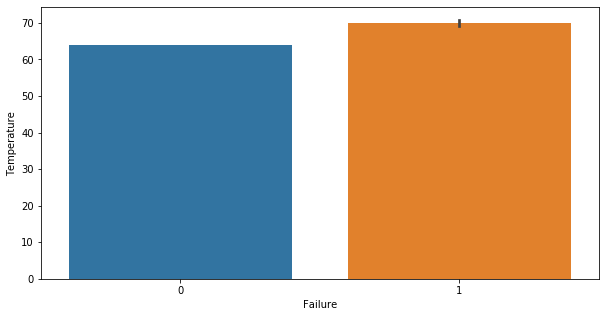

In [43]:
sns.barplot(x='Failure', y='Temperature', data=mf)

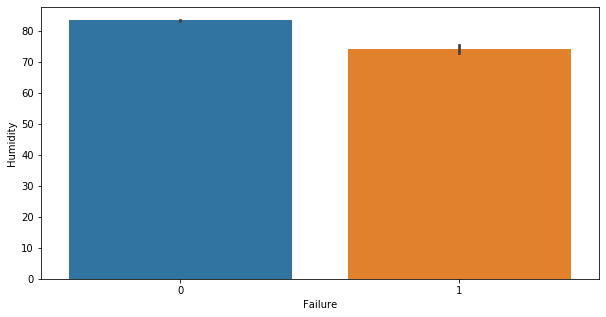

In [44]:
sns.barplot(x='Failure', y='Humidity', data=mf)

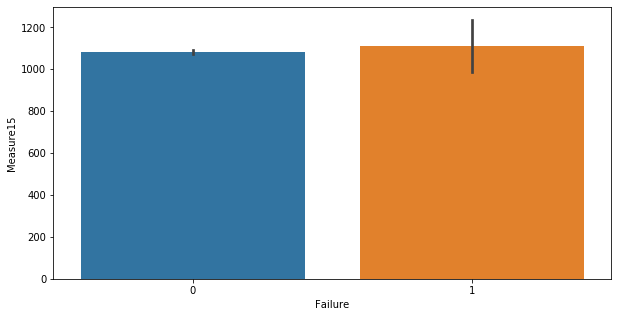

In [45]:
sns.barplot(x='Failure', y='Measure15', data=mf)

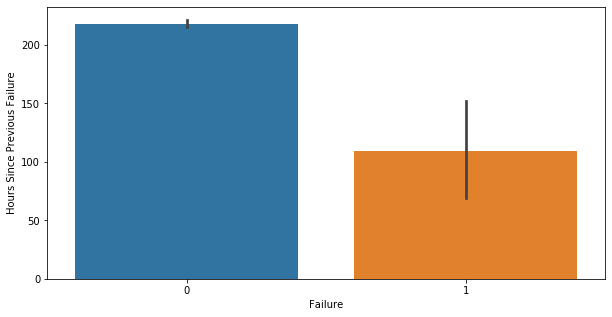

In [46]:
sns.barplot(x='Failure', y='Hours Since Previous Failure', data=mf)

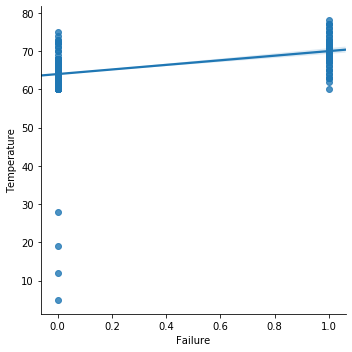

In [47]:
sns.lmplot(x='Failure', y='Temperature', data=mf)

In [48]:
print(mf.Temperature.skew(), mf.Humidity.skew(), mf.Measure1.skew(), mf.Measure2.skew(), mf.Measure3.skew(), mf.Measure4.skew(), mf.Measure5.skew(), mf.Measure6.skew(), mf.Measure7.skew(), mf.Measure8.skew(), mf.Measure9.skew(), mf.Measure10.skew(), mf.Measure11.skew(), mf.Measure12.skew(), mf.Measure13.skew(), mf.Measure14.skew(), mf.Measure15.skew())
#['Temperature', 'Humidity', 'Measure1', 'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14', 'Measure15', 'Hours Since Previous Failure']

-2.1619261491795343 0.3171152450774479 -0.015506669019771276 0.004266950594137474 0.0014641303577594919 0.030359980317433612 -0.0008008122165479052 0.014187870902885012 -0.005270572284884046 0.006523284282387669 0.014179269534766805 2.1538234055917943e-05 -0.010045774731083063 -0.010025994004579007 0.02477880839088793 -0.014116323751809939 0.0030907592658610803


<b>Temperature, Humidity and Measure 10 need to be transformed.</b>

In [49]:
#sns.pairplot(mf[numeric_columns])

In [50]:
#corr

<b>*No Numerical columns are correlated*</b>

In [51]:
mf.head()

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,...,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,month,date,hour,dayOfWeek
0,67,82,1,291,1,1,1041,846,334,706,...,968,1185,1355,1842,90,0,1,1,0,5
1,68,77,1,1180,1,1,1915,1194,637,1093,...,723,1446,719,748,91,0,1,1,1,5
2,64,76,1,1406,1,1,511,1577,1121,1948,...,1123,717,1518,1689,92,0,1,1,2,5
3,63,80,1,550,1,1,1754,1834,1413,1151,...,1434,502,1336,711,93,0,1,1,3,5
4,65,81,1,1928,1,2,1326,1082,233,1441,...,1819,1616,1507,507,94,0,1,1,4,5


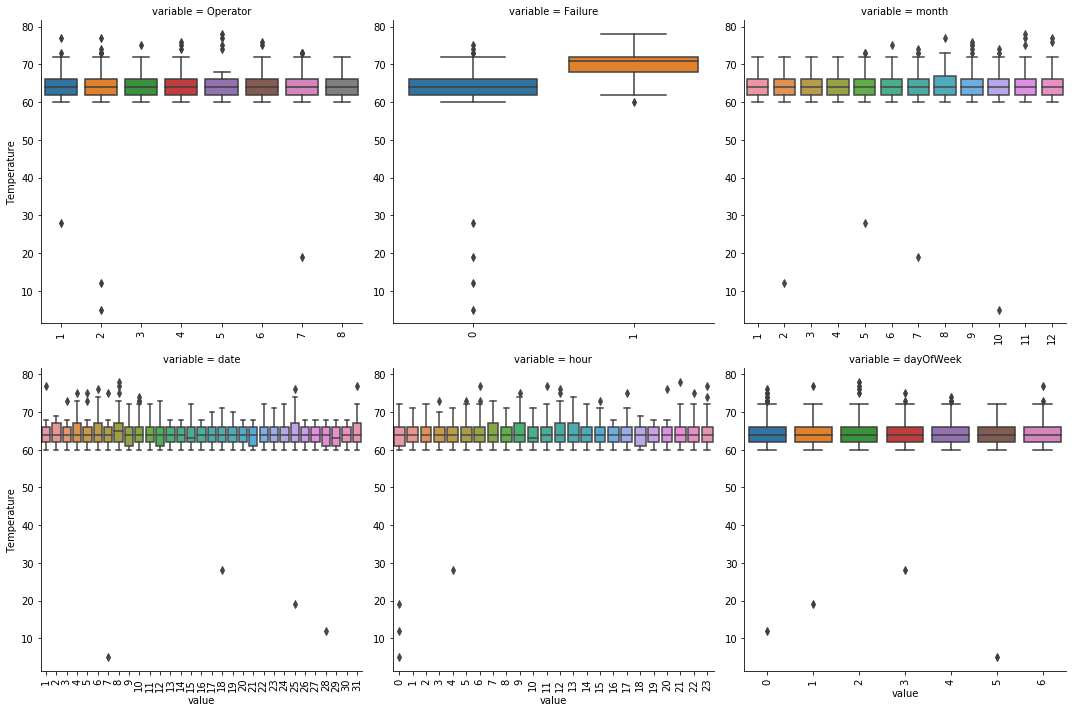

In [52]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(mf, id_vars=['Temperature'], value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "Temperature")

<b>Temperature = Failure</b><br>
<b>Humidity    = Failure and Month</b><br>
<b>Measure1    = Failure</b><br>
<b>Measure2    = Operator, Month, Date, Hour, Day of week</b><br>
<b>Measure3    = Constant for everything</b><br>
<b>Measure4    = No effect</b><br>
<b>Measure5    = Failure</b><br>
<b>Measure6    = No effect</b><br>
<b>Measure7    = No effect</b><br>
<b>Measure8    = Failure</b><br>
<b>Measure9    = Failure</b><br>
<b>Measure10    = Failure</b><br>
<b>Measure11    = Failure</b><br>
<b>Measure12    = No effect</b><br>
<b>Measure13    = Failure</b><br>
<b>Measure14    = No effect</b><br>
<b>Measure15    = No effect</b><br>
<b>Hours Since Previous Failure    = Failure, Month</b><br>

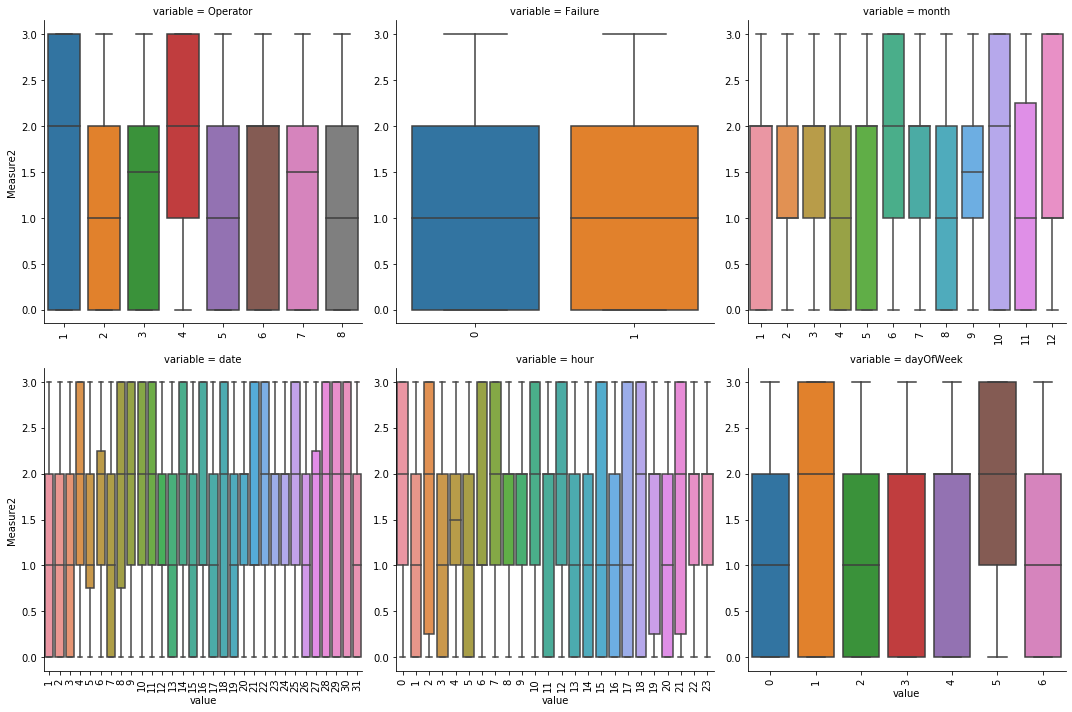

In [53]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(mf, id_vars=['Measure2'], value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "Measure2")

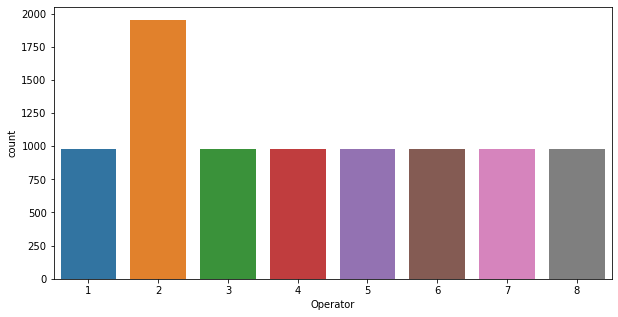

In [54]:
sns.countplot(x='Operator', data=mf)

<b>Operator 2 have more counts and more failures also</b>

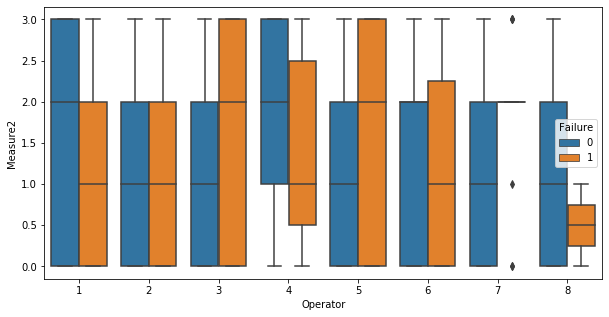

In [55]:
sns.boxplot(x='Operator', y='Measure2', hue='Failure', data=mf)

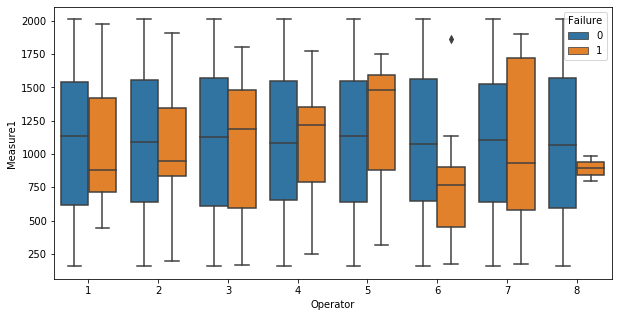

In [56]:
sns.boxplot(x='Operator', y='Measure1', hue='Failure', data=mf)

In [57]:
from sklearn.preprocessing import power_transform
mf['Temperature2'] = power_transform(mf[['Temperature']], method='yeo-johnson')
mf['Temperature2'].skew()

0.15290885175019378

In [58]:
from sklearn.preprocessing import power_transform
mf['Humidity2'] = power_transform(mf[['Humidity']], method='yeo-johnson')
mf['Humidity2'].skew()

-0.0015016846707645098

In [59]:
from sklearn.preprocessing import power_transform
mf['Measure10_2'] = power_transform(mf[['Measure1']], method='yeo-johnson')
mf['Measure10_2'].skew()

-0.19376449591825082

In [60]:
mf.drop(columns=['Temperature'], inplace=True)

In [61]:
mf.drop(columns=['Humidity'], inplace=True)

In [62]:
mf.drop(columns=['Measure10'], inplace=True)

In [63]:
targets = mf['Failure']
mf.drop(columns=['Failure'], inplace=True)
mf.head()

,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,...,Measure14,Measure15,Hours Since Previous Failure,month,date,hour,dayOfWeek,Temperature2,Humidity2,Measure10_2
0,1,291,1,1,1041,846,334,706,1086,256,...,1355,1842,90,1,1,0,5,1.090469,-0.234179,-1.581417
1,1,1180,1,1,1915,1194,637,1093,524,919,...,719,748,91,1,1,1,5,1.494277,-1.356558,0.227611
2,1,1406,1,1,511,1577,1121,1948,1882,1301,...,1518,1689,92,1,1,2,5,-0.053211,-1.595408,0.618168
3,1,550,1,1,1754,1834,1413,1151,945,1312,...,1336,711,93,1,1,3,5,-0.412385,-0.669386,-0.985140
4,1,1928,1,2,1326,1082,233,1441,1736,1033,...,1507,507,94,1,1,4,5,0.316883,-0.449591,1.465207


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mf, targets, test_size=0.25, random_state=9)
print(X_train.shape)
print(X_test.shape)

(6588, 23)
(2196, 23)


In [74]:
from sklearn.metrics import accuracy_score
def accr(expected, predicted):
    return accuracy_score(expected, predicted)

In [75]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
train_pred = lgr.predict(X_train)
print('Accuracy:', accuracy_score(y_train, train_pred))

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9965088038858531


In [76]:
y_pred = lgr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9972677595628415


In [77]:
from sklearn.svm import SVC
spvr = SVC()
spvr.fit(X_train, y_train)
train_pred = spvr.predict(X_train)
print('Accuracy:', accuracy_score(y_train, train_pred))

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 1.0


In [78]:
y_pred = spvr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9922586520947176


In [79]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(X_train, y_train)
train_pred = tr.predict(X_train)
print('Accuracy:', accuracy_score(y_train, train_pred))

Accuracy: 1.0


In [80]:
y_pred = tr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9959016393442623


In [81]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(X_train, y_train)
train_pred = kc.predict(X_train)
print('Accuracy:', accuracy_score(y_train, train_pred))

Accuracy: 0.9902853673345476


In [82]:
y_pred = kc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9922586520947176
